# Education Project - Initial Exploration
Author: Ruman Sidhu  
Purpose: Explore and analyze education and healthcare access gaps using demographic and geographic data.

In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA_DIR = os.path.join('..', 'data')

In [18]:
import glob

print("Data files in folder:")
for file in glob.glob(os.path.join(DATA_DIR, '*')):
    print("-", os.path.basename(file))

Data files in folder:
- 2020-Census-Disclosure-Avoidance-System-Detailed-Summary-Metrics_Dataset.xlsx
- ccd_sch_029_1617_w_1a_11212017.csv
- EdGap_data.xlsx
- Hospital_General_Information_Dataset.csv
- processed_edgap.csv
- README.md


In [19]:
edgap_path = os.path.join(DATA_DIR, 'EdGap_data.xlsx')

if os.path.exists(edgap_path):
    edgap = pd.read_excel(edgap_path)
    display(edgap.head())
    print("EdGap_data.xlsx shape:", edgap.shape)
else:
    print("File not found:", edgap_path)

C:\Users\Asus\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


EdGap_data.xlsx shape: (7986, 7)


In [20]:
if 'edgap' in locals():
    edgap.info()
    display(edgap.describe(include='all').T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   int64  
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 436.9 KB


,count,mean,std,min,25%,50%,75%,max
NCESSCH School ID,7986.0,3.321869e+11,1.323638e+11,1.000016e+11,2.105340e+11,3.600085e+11,4.226678e+11,5.605830e+11
CT Unemployment Rate,7972.0,9.873008e-02,5.895866e-02,0.000000e+00,5.865481e-02,8.564864e-02,1.233764e-01,5.902778e-01
CT Pct Adults with College Degree,7973.0,5.689298e-01,1.657044e-01,9.149327e-02,4.508280e-01,5.549789e-01,6.765714e-01,1.000000e+00
CT Pct Childre In Married Couple Family,7961.0,6.334399e-01,1.967645e-01,0.000000e+00,5.238095e-01,6.675939e-01,7.771346e-01,1.000000e+00
CT Median Household Income,7966.0,5.202691e+04,2.422806e+04,3.589000e+03,3.659725e+04,4.683350e+04,6.136925e+04,2.261810e+05
School ACT average (or equivalent if SAT score),7986.0,2.018153e+01,2.595201e+00,-3.070818e+00,1.860000e+01,2.040000e+01,2.191087e+01,3.236264e+01
School Pct Free and Reduced Lunch,7986.0,4.206510e-01,2.397540e-01,-5.454545e-02,2.385007e-01,3.815698e-01,5.754470e-01,9.987288e-01


Looking for images in: ..\reports
Showing: actual_vs_predicted.png


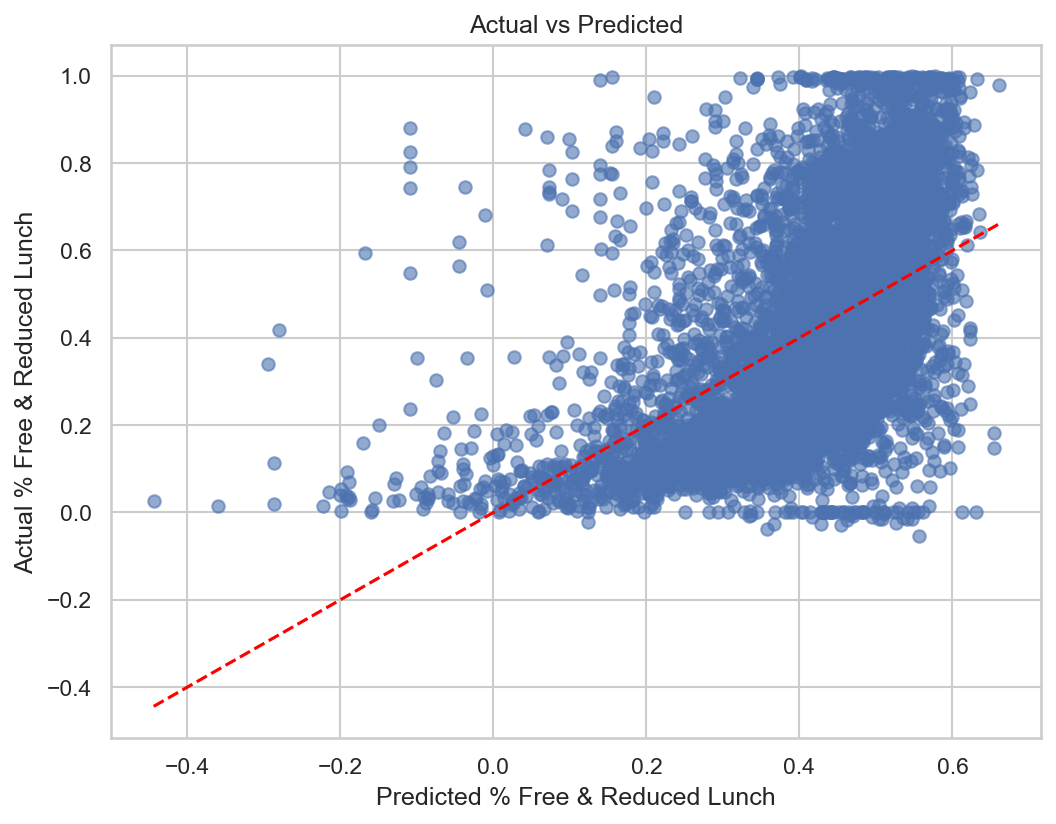

Showing: figure_school_pct_free_reduced_by_income_quartile.png


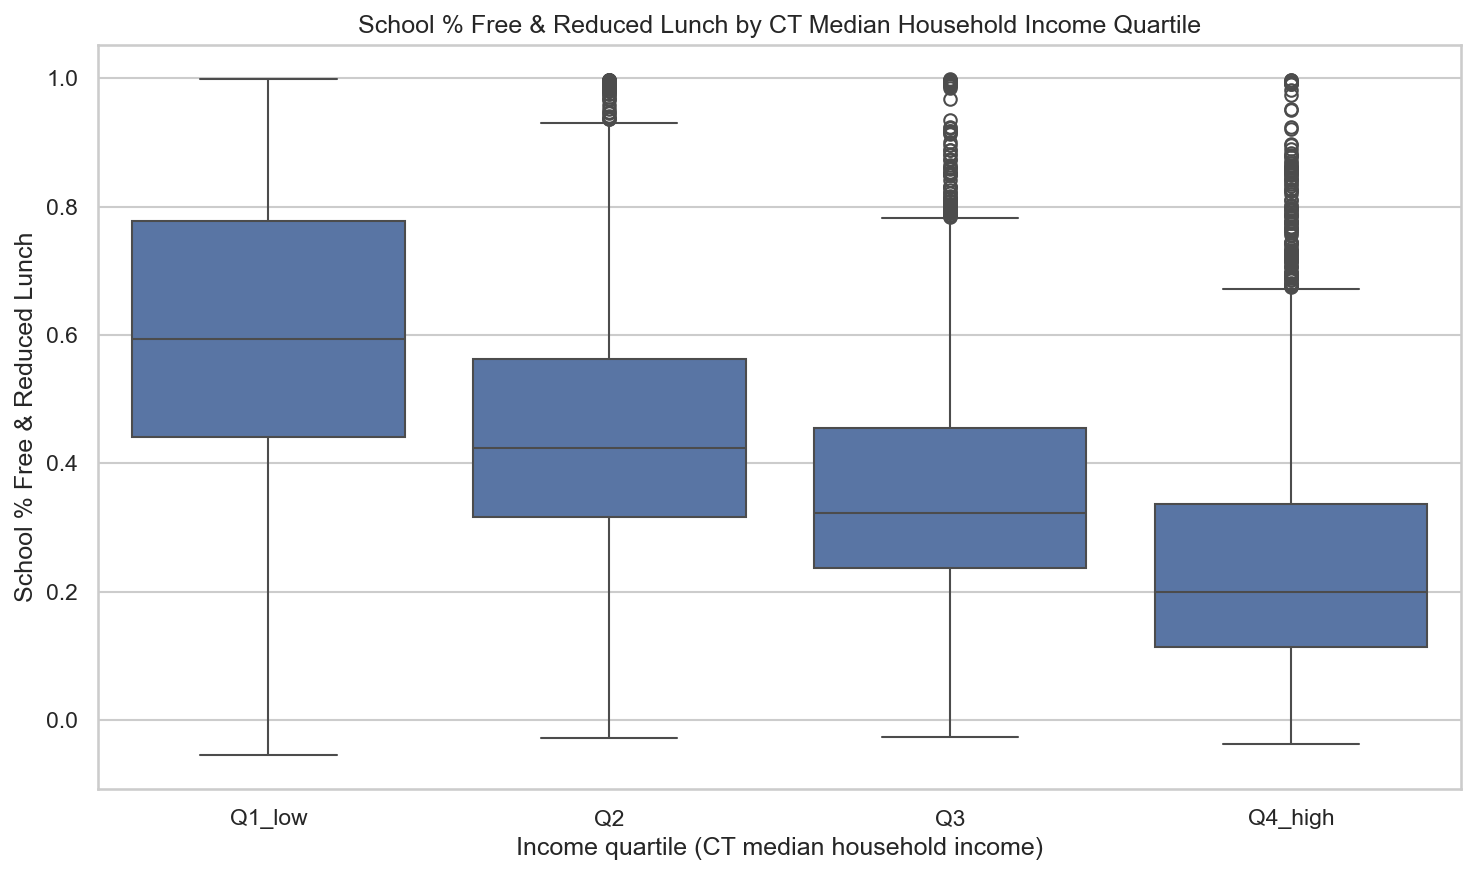

Showing: residuals_histogram.png


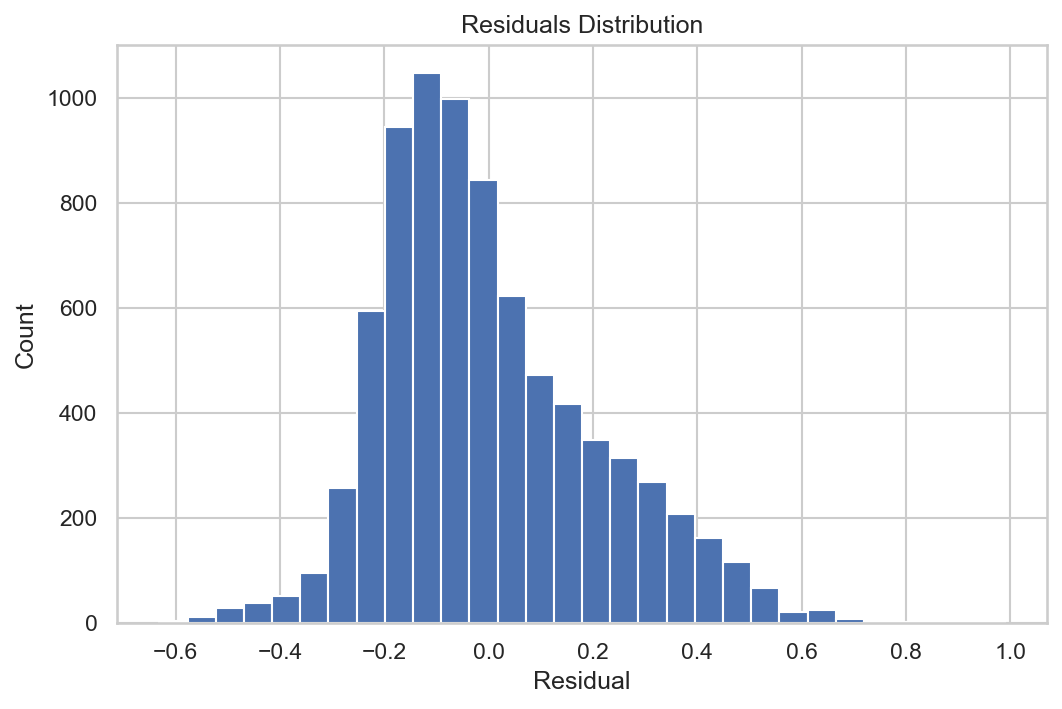

In [21]:
# Display any images found in the reports/ folder so the notebook documents them
import os
from IPython.display import Image, display

reports_dir = os.path.join('..', 'reports')  # adjust if notebook is in a different folder
if not os.path.exists(reports_dir):
    # fallback if code folder is actually 'Code' (capital C) on GitHub
    reports_dir = os.path.join('..', 'Reports')

print("Looking for images in:", reports_dir)
if os.path.exists(reports_dir):
    image_files = [f for f in os.listdir(reports_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]
    if image_files:
        for img in image_files:
            print("Showing:", img)
            display(Image(os.path.join(reports_dir, img)))
    else:
        print("No image files found in the reports folder.")
else:
    print("Reports folder not found at expected location.")